## Import libraries


In [1]:
import numpy as np

# and whatever you need
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## KNN Implementation


In [2]:
class KNNClassifier:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for row in X:
            distances = np.sqrt(np.sum((self.X_train - row) ** 2, axis=1))
            nearest_indices = np.argsort(distances)[: self.k]
            nearest_labels = self.y_train[nearest_indices]
            prediction = np.bincount(nearest_labels).argmax()
            predictions.append(prediction)
        return np.array(predictions)

## Load and preprocess

#### TO DO:

###### 1-Load data

###### 2-Sample equal number of samples from each class. find a reasonable number.

###### 3-Encode categorical values

###### 4-Keep these columns and drop the rest : grade, term, home_ownership, emp_length

###### 5-Split data to train, validation and test set

###### 6-Scale the data(normalization)

###### 7-The target column is "bad_loans"


In [3]:
def load_and_preprocess_data(path):
    data = pd.read_csv(path)
    
    class_0 = data[data['bad_loans'] == 0]
    class_1 = data[data['bad_loans'] == 1]
    min_samples = min(len(class_0), len(class_1))
    class_0 = class_0.sample(min_samples, random_state=42)
    class_1 = class_1.sample(min_samples, random_state=42)
    data = pd.concat([class_0, class_1])
    
    categorical_columns = ['grade', 'term', 'home_ownership', 'emp_length']
    for col in categorical_columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
    
    selected_columns = ['grade', 'term', 'home_ownership', 'emp_length']
    X = data[selected_columns]
    y = data['bad_loans']
    
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, X.columns


#### Training functions


In [4]:
def train_decision_tree(X_train, y_train, d):    
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    return model


# Function to train KNN classifier
def train_knn(X_train, y_train, k):
    model = KNNClassifier(k)
    model.fit(X_train, y_train)
    return model

def train_adaboost(X_train, y_train, n):
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    return model

def train_rf(X_train, y_train):
    model = RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    }
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

In [5]:
def compare_models(dt_accuracy, knn_accuracy, ab_accuracy, rf_accuracy):
    models = ['Decision Tree', 'KNN', 'Adaboost', 'Random Forest']
    accuracies = [dt_accuracy, knn_accuracy, ab_accuracy, rf_accuracy]

    plt.figure(figsize=(8, 6))
    plt.bar(models, accuracies)
    plt.title('Model Comparison - Test Accuracy')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    for i, v in enumerate(accuracies):
        plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
    plt.show()

## The main function

#### TO DO:

###### Use the defined functions to load the dataset and train the models.

###### You should optimize the hyperparameters. Maximum depth for DT and k for KNN and n_estimators for Adaboost.

###### Find the best DT, KNN, Adaboost and RF model and report the test accuracy.


C:\Users\HST\AppData\Local\Temp\ipykernel_12688\2901931345.py:2: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


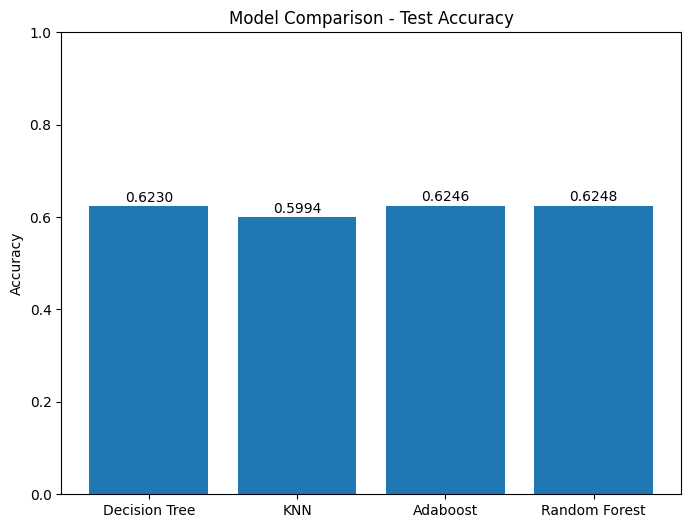

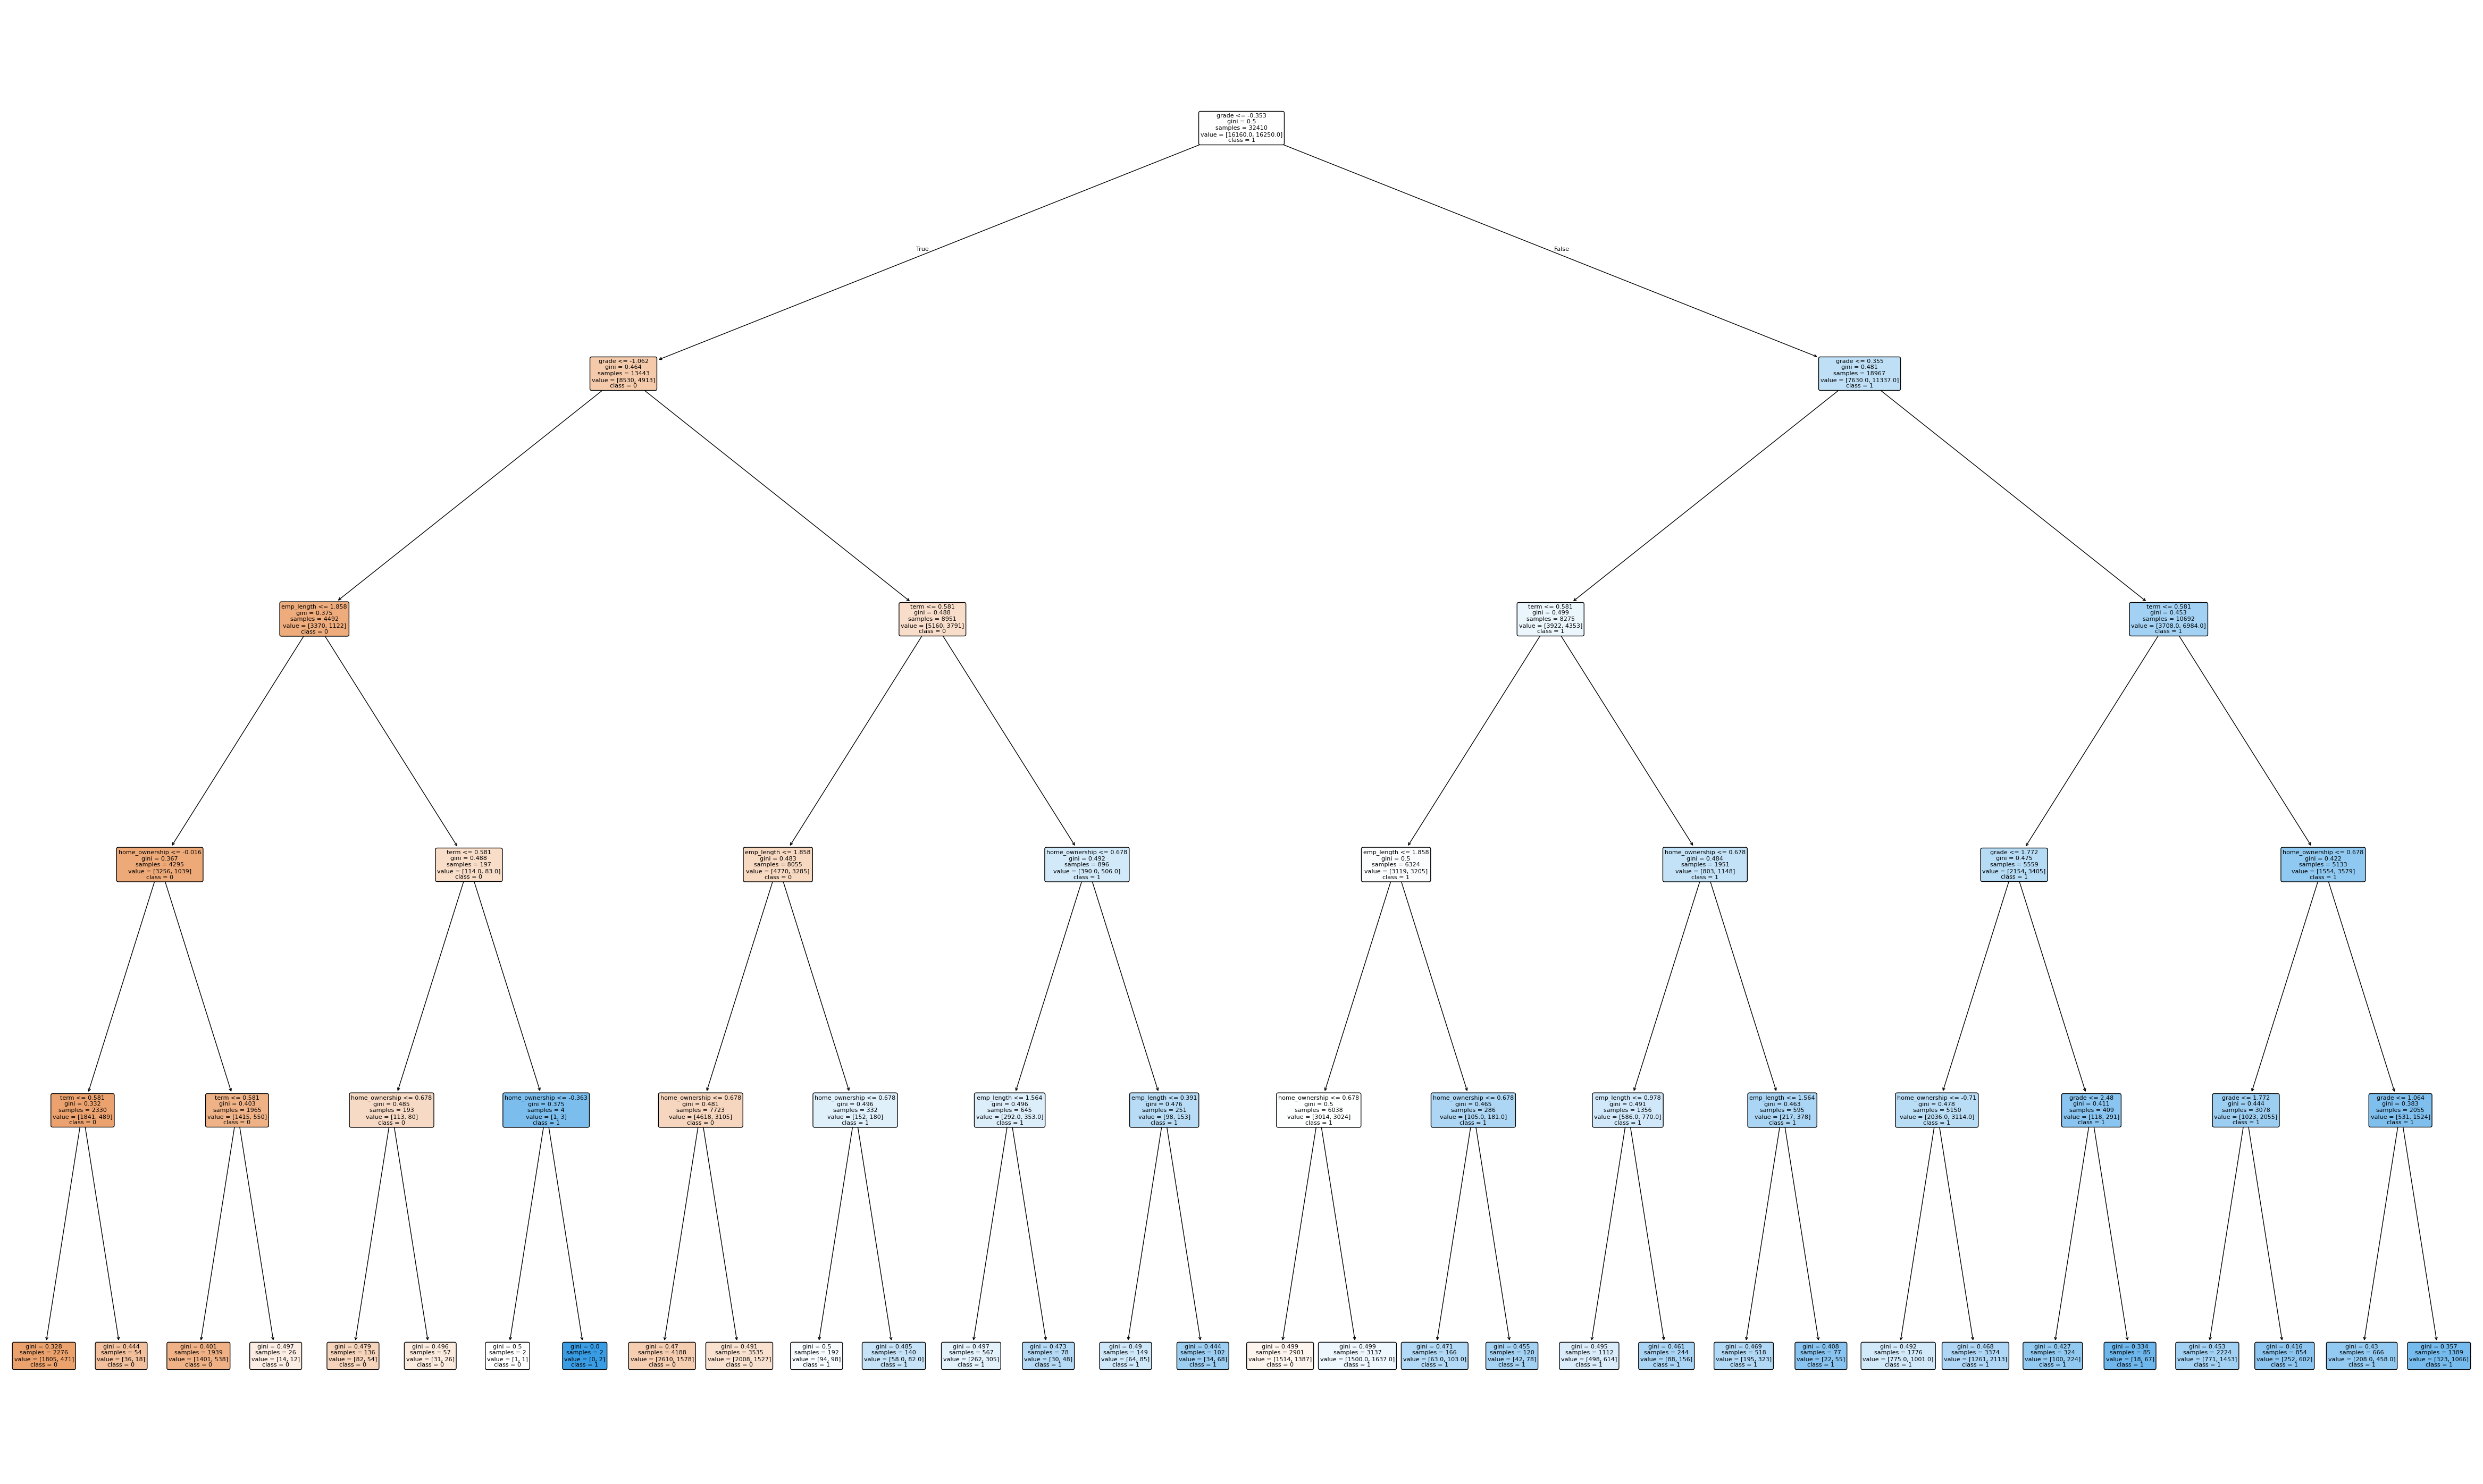

In [6]:
def main():
    path = "loan_sub.csv"
    X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, columns = (
        load_and_preprocess_data(path)
    )

    dt_params = {"max_depth": [3, 5, 7, 10]}
    dt_grid = GridSearchCV(
        DecisionTreeClassifier(random_state=42), dt_params, cv=3, scoring="accuracy"
    )
    dt_grid.fit(X_train_scaled, y_train)
    best_dtmodel = dt_grid.best_estimator_
    dt_val_acc = accuracy_score(y_val, best_dtmodel.predict(X_val_scaled))
    dt_test_acc = accuracy_score(y_test, best_dtmodel.predict(X_test_scaled))

    knn_params = {"k": [3, 5, 7, 9]}
    knn_grid = GridSearchCV(
        KNeighborsClassifier(),
        {"n_neighbors": knn_params["k"]},
        cv=3,
        scoring="accuracy",
    )
    knn_grid.fit(X_train_scaled, y_train)
    best_knnmodel = knn_grid.best_estimator_
    knn_val_acc = accuracy_score(y_val, best_knnmodel.predict(X_val_scaled))
    knn_test_acc = accuracy_score(y_test, best_knnmodel.predict(X_test_scaled))

    ab_params = {"n_estimators": [50, 100, 200]}
    ab_grid = GridSearchCV(
        AdaBoostClassifier(random_state=42), ab_params, cv=3, scoring="accuracy"
    )
    ab_grid.fit(X_train_scaled, y_train)
    best_abmodel = ab_grid.best_estimator_
    ab_val_acc = accuracy_score(y_val, best_abmodel.predict(X_val_scaled))
    ab_test_acc = accuracy_score(y_test, best_abmodel.predict(X_test_scaled))

    best_rfmodel = train_rf(X_train_scaled, y_train)
    rf_val_acc = accuracy_score(y_val, best_rfmodel.predict(X_val_scaled))
    rf_test_acc = accuracy_score(y_test, best_rfmodel.predict(X_test_scaled))

    ## your code goes here ##

    compare_models(dt_test_acc, knn_test_acc, ab_test_acc, rf_test_acc)


    plt.figure(figsize=(60, 36))
    plot_tree(
        best_dtmodel,

        feature_names=columns,

        class_names=["0", "1"],

        filled=True,

        rounded=True,

        fontsize=8,
    )

    plt.show()



if __name__ == "__main__":
    main()